In [1]:
## Import necessary librarise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#read cvs file
#df = pd.read_csv('C:\\Lincolnuni\\COMP_647\\project_1\\comp647\\dataset\\raw\\crop_yield_dataset.csv')
df = pd.read_csv('../dataset/processed/crop_weather_data.csv')

# Display the first 5 rows
df.head()

,Date,Crop_Type,Temperature,Humidity,Wind_Speed,Crop_Yield,Year,Month,Day
0,2014-01-01,Wheat,9.440599,80.000000,10.956707,0.000000,2014,1,1
1,2014-01-01,Corn,20.052576,79.947424,8.591577,104.871310,2014,1,1
2,2014-01-01,Rice,12.143099,80.000000,7.227751,0.000000,2014,1,1
3,2014-01-01,Barley,19.751848,80.000000,2.682683,58.939796,2014,1,1
4,2014-01-01,Soybean,16.110395,80.000000,7.696070,32.970413,2014,1,1


In [3]:
print(df.isnull().sum())

Date           0
Crop_Type      0
Temperature    0
Humidity       0
Wind_Speed     0
Crop_Yield     0
Year           0
Month          0
Day            0
dtype: int64


In [4]:
#Print data info (data types, non-null counts, memory usage)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         36520 non-null  object 
 1   Crop_Type    36520 non-null  object 
 2   Temperature  36520 non-null  float64
 3   Humidity     36520 non-null  float64
 4   Wind_Speed   36520 non-null  float64
 5   Crop_Yield   36520 non-null  float64
 6   Year         36520 non-null  int64  
 7   Month        36520 non-null  int64  
 8   Day          36520 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 2.5+ MB
None


In [ ]:
# Round Temperature, Humidity, and Wind_Speed to nearest integer
df_weather['Temperature_int'] = df_weather['Temperature'].round().astype(int)
df_weather['Humidity_int'] = df_weather['Humidity'].round().astype(int)
df_weather['Wind_Speed_int'] = df_weather['Wind_Speed'].round().astype(int)

print(df_weather[['Temperature', 'Temperature_int',
                  'Humidity', 'Humidity_int',
                  'Wind_Speed', 'Wind_Speed_int']].head())

In [5]:
#Display summary statistics for numerical columns
print(df.describe())

        Temperature      Humidity    Wind_Speed    Crop_Yield          Year  \
count  36520.000000  36520.000000  36520.000000  36520.000000  36520.000000   
mean      23.813996     74.256624     10.020153     26.878480   2018.499726   
std        8.920519      6.767587      2.998310     25.740936      2.871939   
min       -3.540176     45.851089     -3.388906      0.000000   2014.000000   
25%       17.168542     69.745252      7.985872      0.000000   2016.000000   
50%       22.902987     77.097013     10.000299     23.366344   2018.500000   
75%       30.254748     80.000000     12.038546     46.415729   2021.000000   
max       54.148911     80.000000     22.606078    136.711982   2023.000000   

              Month           Day  
count  36520.000000  36520.000000  
mean       6.523549     15.727820  
std        3.448580      8.799445  
min        1.000000      1.000000  
25%        4.000000      8.000000  
50%        7.000000     16.000000  
75%       10.000000     23.000000  


In [8]:
# Check if there are any rows with Crop_Yield = 0
zero_yield = df[df['Crop_Yield'] == 0]

# Print how many records have zero yield
print(f"Number of records with Crop_Yield = 0: {len(zero_yield)}")

# If any, show a preview of them
if not zero_yield.empty:
    print("\nExamples of rows with zero yield:")
    print(zero_yield.head())

Number of records with Crop_Yield = 0: 11025

Examples of rows with zero yield:
          Date  Crop_Type  Temperature  Humidity  Wind_Speed  Crop_Yield  \
0   2014-01-01      Wheat     9.440599      80.0   10.956707         0.0   
2   2014-01-01       Rice    12.143099      80.0    7.227751         0.0   
6   2014-01-01  Sugarcane    13.533004      80.0    9.910484         0.0   
12  2014-01-02       Rice    14.421759      80.0    9.096689         0.0   
14  2014-01-02    Soybean     9.347238      80.0   10.403287         0.0   

    Year  Month  Day  
0   2014      1    1  
2   2014      1    1  
6   2014      1    1  
12  2014      1    2  
14  2014      1    2  


In [11]:
# Calculate total number of records per Crop_Type
total_counts = df.groupby('Crop_Type').size().reset_index(name='Total_Count')

# Calculate number of zero-yield records per Crop_Type
zero_counts = (
    df[df['Crop_Yield'] == 0]
    .groupby('Crop_Type')
    .size()
    .reset_index(name='Zero_Yield_Count')
)

# Merge both results into one DataFrame
result = pd.merge(total_counts, zero_counts, on='Crop_Type', how='left')

# Replace NaN (if a crop has no zero yields) with 0
result['Zero_Yield_Count'] = result['Zero_Yield_Count'].fillna(0).astype(int)

# Add ratio (%) of zero-yield records
result['Zero_Yield_Ratio(%)'] = (
    result['Zero_Yield_Count'] / result['Total_Count'] * 100
).round(2)

print("📊 Total records and zero-yield records by Crop_Type")
print(result)

# Add a TOTAL row at the bottom
total_row = pd.DataFrame({
    'Crop_Type': ['TOTAL'],
    'Total_Count': [result['Total_Count'].sum()],
    'Zero_Yield_Count': [result['Zero_Yield_Count'].sum()],
    'Zero_Yield_Ratio(%)': [
        (result['Zero_Yield_Count'].sum() / result['Total_Count'].sum() * 100).round(2)
    ]
})
result = pd.concat([result, total_row], ignore_index=True)

print("\n📊 Total summary including all Crop_Types")
print(result)

📊 Total records and zero-yield records by Crop_Type
   Crop_Type  Total_Count  Zero_Yield_Count  Zero_Yield_Ratio(%)
0     Barley         3652              1131                30.97
1       Corn         3652              1128                30.89
2     Cotton         3652              1111                30.42
3     Potato         3652              1093                29.93
4       Rice         3652              1083                29.65
5    Soybean         3652              1087                29.76
6  Sugarcane         3652              1096                30.01
7  Sunflower         3652              1105                30.26
8     Tomato         3652              1086                29.74
9      Wheat         3652              1105                30.26

📊 Total summary including all Crop_Types
    Crop_Type  Total_Count  Zero_Yield_Count  Zero_Yield_Ratio(%)
0      Barley         3652              1131                30.97
1        Corn         3652              1128               

In [8]:
# Example: Remove outliers from the 'Temperature' column using the IQR method
Q1 = df['Temperature'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['Temperature'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

print(Q1)
print(Q3)

17.16854151919032
30.254747923460776


In [9]:
# Filter out values outside the acceptable range (Q1 - 1.5*IQR to Q3 + 1.5*IQR)
df = df[(df['Temperature'] >= Q1 - 1.5 * IQR) & (df['Temperature'] <= Q3 + 1.5 * IQR)]
print(df)
print("Outliers removed from 'Temperature' using IQR method")

             Date  Crop_Type  Temperature   Humidity  Wind_Speed  Crop_Yield  \
0      2014-01-01      Wheat     9.440599  80.000000   10.956707    0.000000   
1      2014-01-01       Corn    20.052576  79.947424    8.591577  104.871310   
2      2014-01-01       Rice    12.143099  80.000000    7.227751    0.000000   
3      2014-01-01     Barley    19.751848  80.000000    2.682683   58.939796   
4      2014-01-01    Soybean    16.110395  80.000000    7.696070   32.970413   
...           ...        ...          ...        ...         ...         ...   
36515  2023-12-31     Cotton    19.538555  80.000000    3.666664   73.323885   
36516  2023-12-31  Sugarcane    21.068336  78.931664    8.795036   39.226521   
36517  2023-12-31     Tomato     6.030148  80.000000    9.409497    0.000000   
36518  2023-12-31     Potato    11.079561  80.000000   10.969366    6.067881   
36519  2023-12-31  Sunflower    11.455692  80.000000    5.394758   11.825986   

       Year  Month  Day  
0      2014  

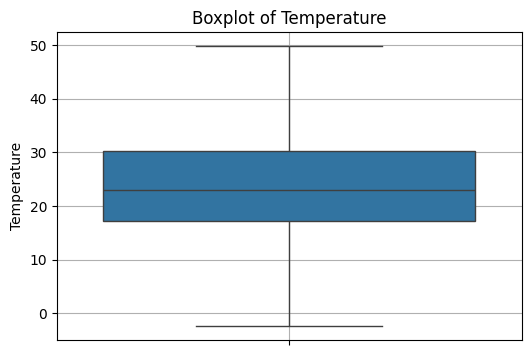

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(6, 4))

# Draw boxplot for 'Temperature'
sns.boxplot(y=df['Temperature'])

# Set title
plt.title('Boxplot of Temperature')
plt.ylabel('Temperature')
plt.grid(True)

# Show the plot
plt.show()

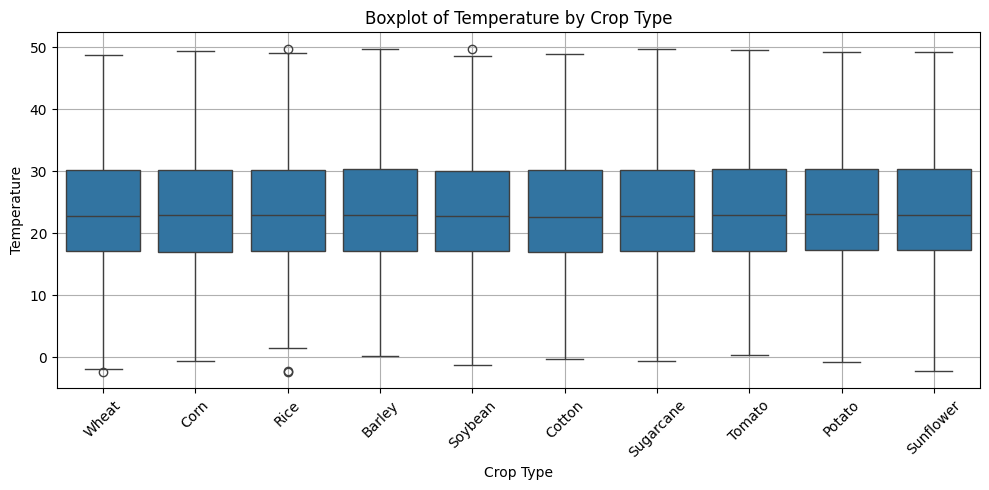

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Crop_Type', y='Temperature', data=df)

plt.title('Boxplot of Temperature by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
df['Temp_Quartile'] = pd.qcut(df['Temperature'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
print(df[['Temperature', 'Temp_Quartile']].head())

   Temperature Temp_Quartile
0     9.440599            Q1
1    20.052576            Q2
2    12.143099            Q1
3    19.751848            Q2
4    16.110395            Q1


In [13]:
# Define custom bins (in °C)
bins = [-10, 0, 10, 20, 30, 55]  # 예: 0~10, 10~20, 20~30, 30~40
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new column 'Temp_Category' based on the bins
df['Temp_Category'] = pd.cut(df['Temperature'], bins=bins, labels=labels, include_lowest=True)

print(df[['Temperature', 'Temp_Category']].head())

   Temperature Temp_Category
0     9.440599           Low
1    20.052576          High
2    12.143099        Medium
3    19.751848        Medium
4    16.110395        Medium


In [14]:
# Group by temperature category and calculate mean yield
mean_yield = df.groupby('Temp_Category')['Crop_Yield'].mean()

C:\Users\james\AppData\Local\Temp\ipykernel_26664\3384389872.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_yield = df.groupby('Temp_Category')['Crop_Yield'].mean()


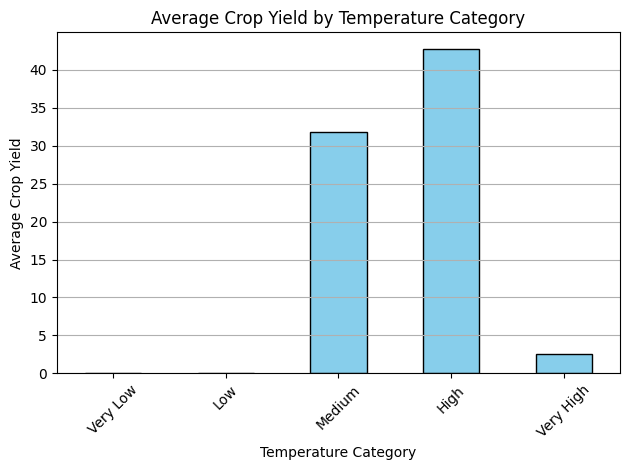

In [15]:
# Plot bar chart
mean_yield.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Crop Yield by Temperature Category')
plt.ylabel('Average Crop Yield')
plt.xlabel('Temperature Category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [16]:
# Group by Crop_Type and Temp_Category, calculate mean Crop_Yield
grouped = df.groupby(['Crop_Type', 'Temp_Category'])['Crop_Yield'].mean().unstack()

C:\Users\james\AppData\Local\Temp\ipykernel_26664\101577167.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Crop_Type', 'Temp_Category'])['Crop_Yield'].mean().unstack()


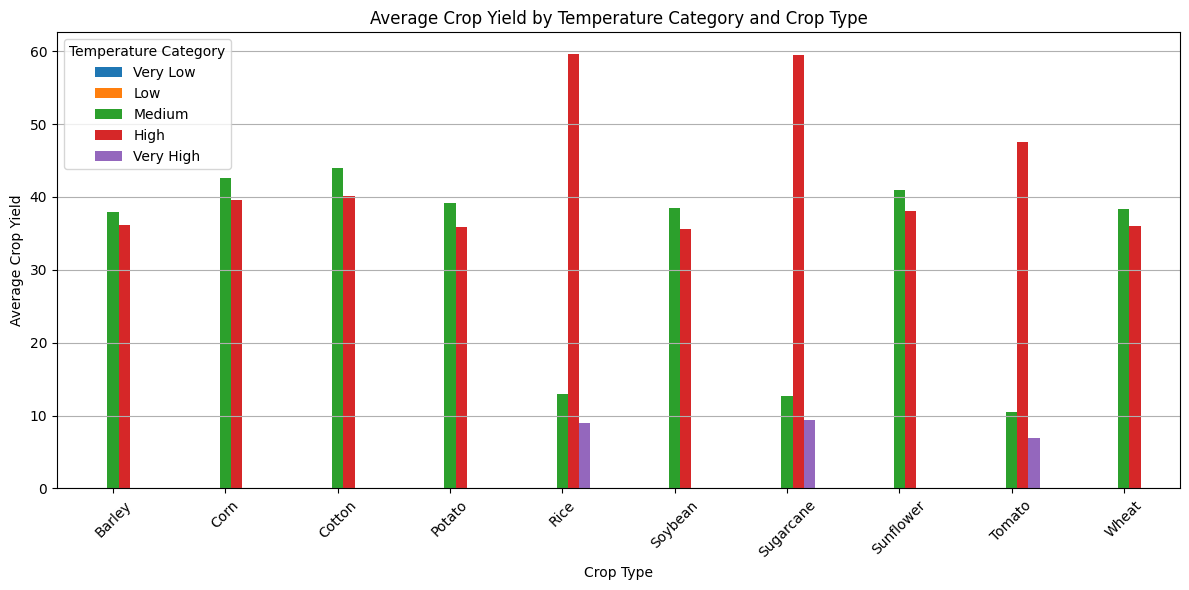

In [17]:
# Plot grouped bar chart
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Average Crop Yield by Temperature Category and Crop Type')
plt.ylabel('Average Crop Yield')
plt.xlabel('Crop Type')
plt.xticks(rotation=45)
plt.legend(title='Temperature Category')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

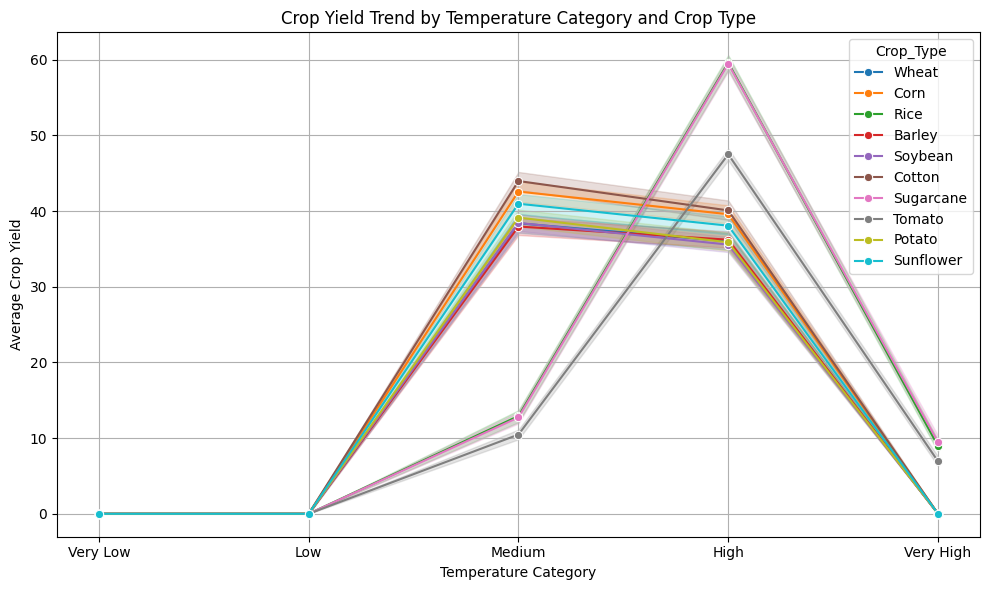

In [18]:
plt.figure(figsize=(10, 6))
# Seaborn lineplot: 평균 Crop_Yield by Crop_Type and Temp_Category
sns.lineplot(data=df, x='Temp_Category', y='Crop_Yield', hue='Crop_Type', marker='o')

plt.title('Crop Yield Trend by Temperature Category and Crop Type')
plt.xlabel('Temperature Category')
plt.ylabel('Average Crop Yield')
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# Example: Apply One-Hot Encoding to the 'Crop_Type' column
if 'Crop_Type' in df.columns:
    df = pd.get_dummies(df, columns=['Crop_Type'], prefix='Crop')
    print(df)

             Date  Temperature   Humidity  Wind_Speed  Crop_Yield  Year  \
0      2014-01-01     9.440599  80.000000   10.956707    0.000000  2014   
1      2014-01-01    20.052576  79.947424    8.591577  104.871310  2014   
2      2014-01-01    12.143099  80.000000    7.227751    0.000000  2014   
3      2014-01-01    19.751848  80.000000    2.682683   58.939796  2014   
4      2014-01-01    16.110395  80.000000    7.696070   32.970413  2014   
...           ...          ...        ...         ...         ...   ...   
36515  2023-12-31    19.538555  80.000000    3.666664   73.323885  2023   
36516  2023-12-31    21.068336  78.931664    8.795036   39.226521  2023   
36517  2023-12-31     6.030148  80.000000    9.409497    0.000000  2023   
36518  2023-12-31    11.079561  80.000000   10.969366    6.067881  2023   
36519  2023-12-31    11.455692  80.000000    5.394758   11.825986  2023   

       Month  Day Temp_Quartile Temp_Category  Crop_Barley  Crop_Corn  \
0          1    1         

In [20]:
pd.set_option('display.max_columns', None)
print(df.columns.tolist())

['Date', 'Temperature', 'Humidity', 'Wind_Speed', 'Crop_Yield', 'Year', 'Month', 'Day', 'Temp_Quartile', 'Temp_Category', 'Crop_Barley', 'Crop_Corn', 'Crop_Cotton', 'Crop_Potato', 'Crop_Rice', 'Crop_Soybean', 'Crop_Sugarcane', 'Crop_Sunflower', 'Crop_Tomato', 'Crop_Wheat']


In [21]:
df_rice = df[df['Crop_Rice'] == 1]
print(df_rice)

             Date  Temperature   Humidity  Wind_Speed  Crop_Yield  Year  \
2      2014-01-01    12.143099  80.000000    7.227751    0.000000  2014   
12     2014-01-02    14.421759  80.000000    9.096689    0.000000  2014   
22     2014-01-03    12.327918  80.000000    5.514838    0.000000  2014   
32     2014-01-04    11.208364  80.000000   11.372247    0.000000  2014   
42     2014-01-05    15.065169  80.000000   11.133309    0.566930  2014   
...           ...          ...        ...         ...         ...   ...   
36472  2023-12-27    13.775894  80.000000    6.347917    0.000000  2023   
36482  2023-12-28    11.876830  80.000000   11.781339    0.000000  2023   
36492  2023-12-29    26.660243  73.339757    8.561608   78.800717  2023   
36502  2023-12-30     9.629740  80.000000    9.134019    0.000000  2023   
36512  2023-12-31     3.994628  80.000000   14.388341    0.000000  2023   

       Month  Day Temp_Quartile Temp_Category  Crop_Barley  Crop_Corn  \
2          1    1         

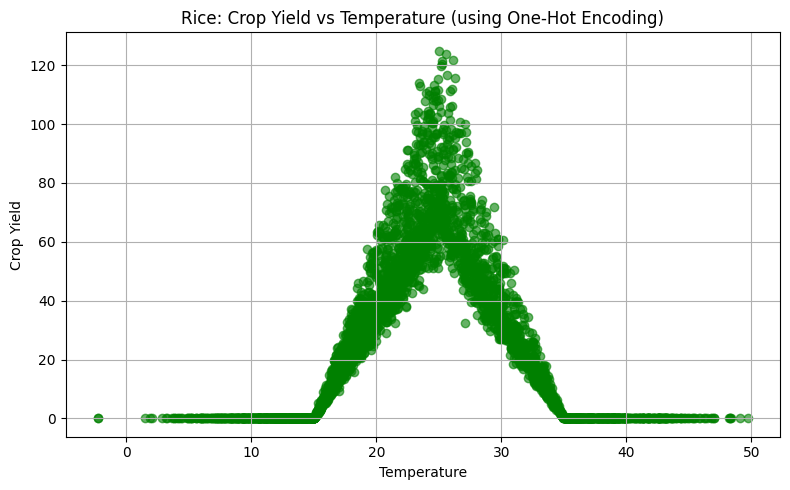

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(df_rice['Temperature'], df_rice['Crop_Yield'], color='green', alpha=0.6)
plt.title('Rice: Crop Yield vs Temperature (using One-Hot Encoding)')
plt.xlabel('Temperature')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.tight_layout()
plt.show()

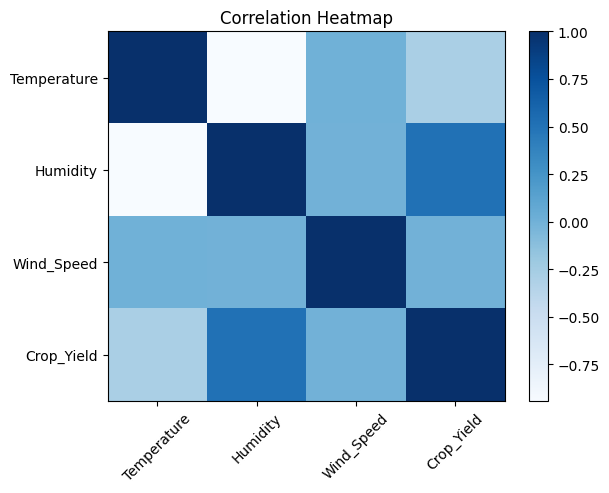

In [ ]:
#
corr = df[["Temperature", "Humidity", "Wind_Speed", "Crop_Yield"]].corr()
plt.figure()
plt.imshow(corr.values, cmap="Blues", aspect="auto")
plt.colorbar()
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=45)
plt.yticks(ticks=np.arange(len(corr.columns)), labels=corr.columns)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Profiling Report")

profile.to_file("ProfilingReport.html")

profile.to_file("ProfilingReport.json")